TypeError: Input z must be 2D, not 1D

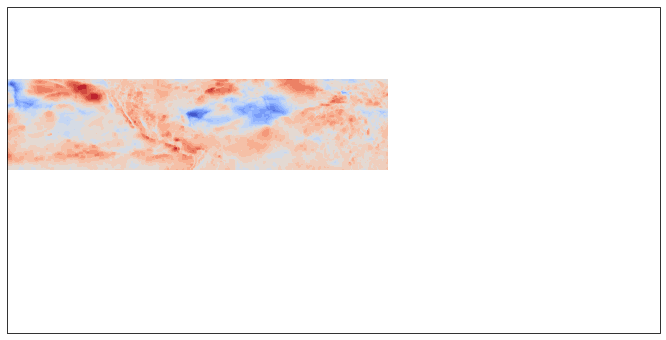

In [3]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values.squeeze()  # Ensure it is 2D
dust_event_u10 = dust_event['u10'].values.squeeze()  # Ensure it is 2D

# Compute anomalies: Dust event minus climatology
anomalies = dust_event_u10 - climatology_u10

# Perform a t-test for statistical significance
t_stat, p_values = ttest_ind(dust_event_u10, climatology_u10, axis=0, equal_var=False, nan_policy='omit')

# Define significance level
significance_level = 0.05
significant_mask = p_values < significance_level

# Create a meshgrid for plotting
lon2d, lat2d = np.meshgrid(lon, lat)

# Plot the composite anomalies with statistical significance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_global()

# Plot anomalies
anomaly_plot = ax.contourf(lon2d, lat2d, anomalies, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay significant areas
ax.contourf(lon2d, lat2d, significant_mask, levels=[0.5, 1], colors='none', hatches=['..'], transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) with Significance")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.show()


/tmp/ipykernel_2913812/3044137700.py:28: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_values = ttest_ind(dust_event_u10[np.newaxis, :, :], climatology_u10[np.newaxis, :, :],
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


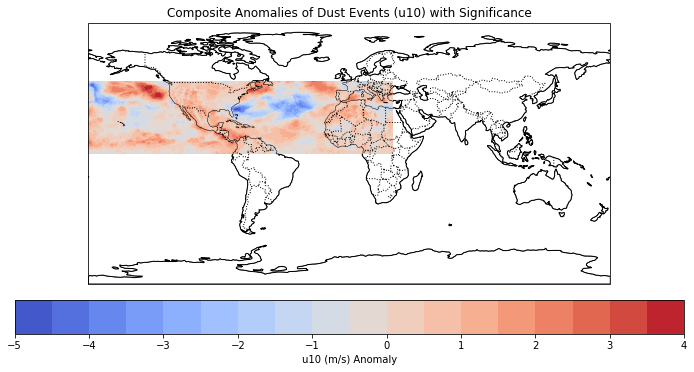

In [4]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values  # Extract raw values
dust_event_u10 = dust_event['u10'].values  # Extract raw values

# Ensure the variables are 2D by checking dimensions
if climatology_u10.ndim == 3:
    climatology_u10 = climatology_u10[0, :, :]  # Squeeze time dimension if present
if dust_event_u10.ndim == 3:
    dust_event_u10 = dust_event_u10[0, :, :]  # Squeeze time dimension if present

# Compute anomalies: Dust event minus climatology
anomalies = dust_event_u10 - climatology_u10

# Perform a t-test for statistical significance
t_stat, p_values = ttest_ind(dust_event_u10[np.newaxis, :, :], climatology_u10[np.newaxis, :, :],
                             axis=0, equal_var=False, nan_policy='omit')

# Define significance level
significance_level = 0.05
significant_mask = p_values < significance_level

# Create a meshgrid for plotting
lon2d, lat2d = np.meshgrid(lon, lat)

# Plot the composite anomalies with statistical significance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_global()

# Plot anomalies
anomaly_plot = ax.contourf(lon2d, lat2d, anomalies, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay significant areas
ax.contourf(lon2d, lat2d, significant_mask.astype(int), levels=[0.5, 1], colors='none', hatches=['..'], transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) with Significance")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.show()


/tmp/ipykernel_2913812/2380993346.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


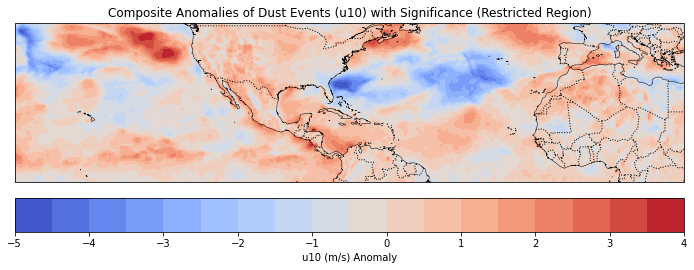

In [6]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values  # Extract raw values
dust_event_u10 = dust_event['u10'].values  # Extract raw values

# Ensure the variables are 2D by checking dimensions
if climatology_u10.ndim == 3:
    climatology_u10 = climatology_u10[0, :, :]  # Squeeze time dimension if present
if dust_event_u10.ndim == 3:
    dust_event_u10 = dust_event_u10[0, :, :]  # Squeeze time dimension if present

# Create a meshgrid for longitude and latitude
lon2d, lat2d = np.meshgrid(lon, lat)

# Restrict data to the specified coordinates
lon_mask = (lon >= -180) & (lon <= 30)
lat_mask = (lat >= 0) & (lat <= 50)

lon2d_restricted = lon2d[:, lon_mask]
lat2d_restricted = lat2d[lat_mask, :]
anomalies_restricted = anomalies[lat_mask, :][:, lon_mask]
dust_event_u10_restricted = dust_event_u10[lat_mask, :][:, lon_mask]
climatology_u10_restricted = climatology_u10[lat_mask, :][:, lon_mask]

# Perform a t-test for statistical significance
t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
                             climatology_u10_restricted[np.newaxis, :, :],
                             axis=0, equal_var=False, nan_policy='omit')

# Define significance level
significance_level = 0.05
significant_mask = p_values < significance_level

# Plot the composite anomalies with statistical significance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_extent([-180, 30, 0, 50], crs=ccrs.PlateCarree())

# Plot anomalies
anomaly_plot = ax.contourf(lon2d_restricted, lat2d_restricted, anomalies_restricted, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay significant areas
ax.contourf(lon2d_restricted, lat2d_restricted, significant_mask.astype(int), levels=[0.5, 1], colors='none', hatches=['..'], transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) with Significance (Restricted Region)")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.show()


/tmp/ipykernel_2913812/3829456444.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


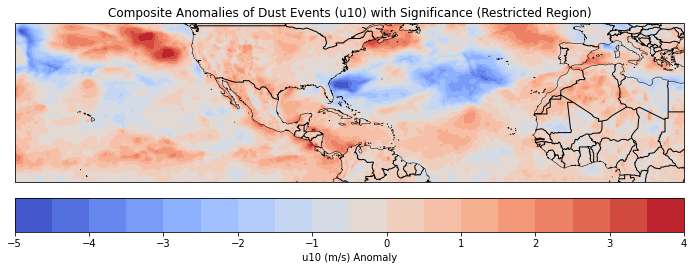

In [7]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values  # Extract raw values
dust_event_u10 = dust_event['u10'].values  # Extract raw values

# Ensure the variables are 2D by checking dimensions
if climatology_u10.ndim == 3:
    climatology_u10 = climatology_u10[0, :, :]  # Squeeze time dimension if present
if dust_event_u10.ndim == 3:
    dust_event_u10 = dust_event_u10[0, :, :]  # Squeeze time dimension if present

# Create a meshgrid for longitude and latitude
lon2d, lat2d = np.meshgrid(lon, lat)

# Restrict data to the specified coordinates
lon_mask = (lon >= -180) & (lon <= 30)
lat_mask = (lat >= 0) & (lat <= 50)

lon2d_restricted = lon2d[:, lon_mask]
lat2d_restricted = lat2d[lat_mask, :]
anomalies_restricted = anomalies[lat_mask, :][:, lon_mask]
dust_event_u10_restricted = dust_event_u10[lat_mask, :][:, lon_mask]
climatology_u10_restricted = climatology_u10[lat_mask, :][:, lon_mask]

# Perform a t-test for statistical significance
t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
                             climatology_u10_restricted[np.newaxis, :, :],
                             axis=0, equal_var=False, nan_policy='omit')

# Define significance level
significance_level = 0.05
significant_mask = p_values < significance_level

# Plot the composite anomalies with statistical significance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_extent([-180, 30, 0, 50], crs=ccrs.PlateCarree())

# Plot anomalies
anomaly_plot = ax.contourf(lon2d_restricted, lat2d_restricted, anomalies_restricted, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay significant areas
ax.contourf(lon2d_restricted, lat2d_restricted, significant_mask.astype(int), levels=[0.5, 1], colors='none', hatches=['..'], transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')  # Add country borders
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) with Significance (Restricted Region)")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.show()


/tmp/ipykernel_2913812/649485935.py:40: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


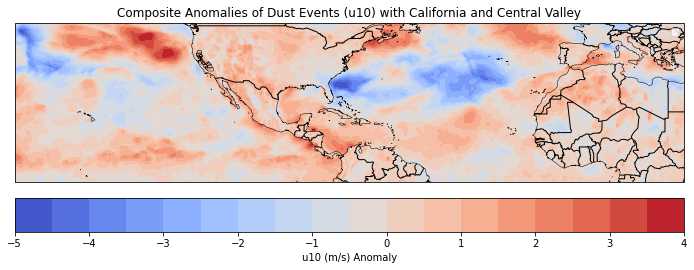

In [19]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values  # Extract raw values
dust_event_u10 = dust_event['u10'].values  # Extract raw values

# Ensure the variables are 2D by checking dimensions
if climatology_u10.ndim == 3:
    climatology_u10 = climatology_u10[0, :, :]  # Squeeze time dimension if present
if dust_event_u10.ndim == 3:
    dust_event_u10 = dust_event_u10[0, :, :]  # Squeeze time dimension if present

# Create a meshgrid for longitude and latitude
lon2d, lat2d = np.meshgrid(lon, lat)

# Restrict data to the specified coordinates
lon_mask = (lon >= -180) & (lon <= 30)
lat_mask = (lat >= 0) & (lat <= 50)

lon2d_restricted = lon2d[:, lon_mask]
lat2d_restricted = lat2d[lat_mask, :]
anomalies_restricted = anomalies[lat_mask, :][:, lon_mask]
dust_event_u10_restricted = dust_event_u10[lat_mask, :][:, lon_mask]
climatology_u10_restricted = climatology_u10[lat_mask, :][:, lon_mask]

# Perform a t-test for statistical significance
t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
                             climatology_u10_restricted[np.newaxis, :, :],
                             axis=0, equal_var=False, nan_policy='omit')

# Define significance level
significance_level = 0.05
significant_mask = p_values < significance_level

# Plot the composite anomalies with statistical significance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_extent([-180, 30, 0, 50], crs=ccrs.PlateCarree())

# Plot anomalies
anomaly_plot = ax.contourf(lon2d_restricted, lat2d_restricted, anomalies_restricted, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay significant areas
ax.contourf(lon2d_restricted, lat2d_restricted, significant_mask.astype(int), levels=[0.5, 1], colors='none', hatches=['..'], transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')  # Add country borders
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

# Add California and Central Valley shapefiles
california_shapefile = "california_shapefile.shp"  # Replace with the path to the shapefile
central_valley_shapefile = "central_valley_counties.shp"  # Replace with the path to the shapefile

# Add California counties
#california_feature = ShapelyFeature(Reader(california_shapefile).geometries(),
  #                                  ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)
#ax.add_feature(california_feature, label="California Counties")

# Add Central Valley
central_valley_feature = ShapelyFeature(Reader(central_valley_shapefile).geometries(),
                                        ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)
ax.add_feature(central_valley_feature, label="Central Valley")

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) with California and Central Valley")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.legend()
plt.show()


/tmp/ipykernel_2913812/3097298730.py:40: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


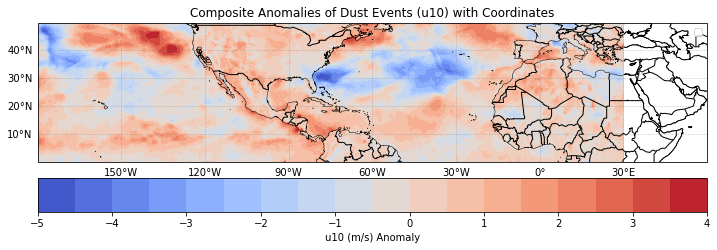

In [25]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values  # Extract raw values
dust_event_u10 = dust_event['u10'].values  # Extract raw values

# Ensure the variables are 2D by checking dimensions
if climatology_u10.ndim == 3:
    climatology_u10 = climatology_u10[0, :, :]  # Squeeze time dimension if present
if dust_event_u10.ndim == 3:
    dust_event_u10 = dust_event_u10[0, :, :]  # Squeeze time dimension if present

# Create a meshgrid for longitude and latitude
lon2d, lat2d = np.meshgrid(lon, lat)

# Restrict data to the specified coordinates
lon_mask = (lon >= -180) & (lon <= 60)
lat_mask = (lat >= 0) & (lat <= 50)

lon2d_restricted = lon2d[:, lon_mask]
lat2d_restricted = lat2d[lat_mask, :]
anomalies_restricted = anomalies[lat_mask, :][:, lon_mask]
dust_event_u10_restricted = dust_event_u10[lat_mask, :][:, lon_mask]
climatology_u10_restricted = climatology_u10[lat_mask, :][:, lon_mask]

# Perform a t-test for statistical significance
t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
                             climatology_u10_restricted[np.newaxis, :, :],
                             axis=0, equal_var=False, nan_policy='omit')

# Define significance level
significance_level = 0.05
significant_mask = p_values < significance_level

# Plot the composite anomalies with statistical significance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_extent([-180, 60, 0, 50], crs=ccrs.PlateCarree())

# Plot anomalies
anomaly_plot = ax.contourf(lon2d_restricted, lat2d_restricted, anomalies_restricted, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay significant areas
ax.contourf(lon2d_restricted, lat2d_restricted, significant_mask.astype(int), levels=[0.5, 1], colors='none', hatches=['..'], transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')  # Add country borders
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

# Add California and Central Valley shapefiles
california_shapefile = "california_shapefile.shp"  # Replace with the path to the shapefile
central_valley_shapefile = "central_valley_counties.shp"  # Replace with the path to the shapefile

# Add California counties
#california_feature = ShapelyFeature(Reader(california_shapefile).geometries(),
  #                                  ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)
#ax.add_feature(california_feature, label="California Counties")

# Add Central Valley
central_valley_feature = ShapelyFeature(Reader(central_valley_shapefile).geometries(),
                                        ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)
ax.add_feature(central_valley_feature, label="Central Valley")

# Add gridlines with labels
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gridlines.top_labels = False  # Turn off the labels on the top
gridlines.right_labels = False  # Turn off the labels on the right
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) with Coordinates")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.legend()
plt.show()


/tmp/ipykernel_2913812/2634926652.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/precious/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


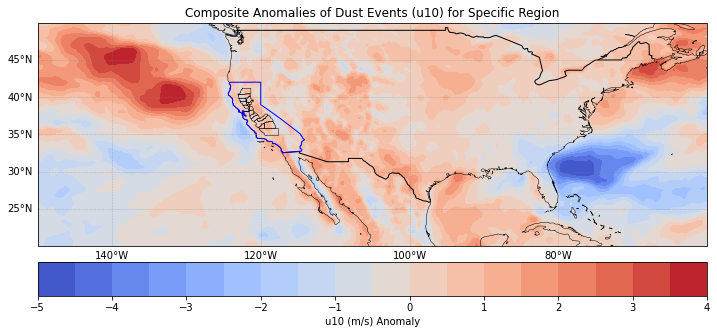

In [36]:
import xarray as xr
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values  # Extract raw values
dust_event_u10 = dust_event['u10'].values  # Extract raw values

# Ensure the variables are 2D by checking dimensions
if climatology_u10.ndim == 3:
    climatology_u10 = climatology_u10[0, :, :]  # Squeeze time dimension if present
if dust_event_u10.ndim == 3:
    dust_event_u10 = dust_event_u10[0, :, :]  # Squeeze time dimension if present

# Restrict data to the specific coordinates
lon_mask = (lon >= -150) & (lon <= -60)  # Longitude range
lat_mask = (lat >= 20) & (lat <= 50)  # Latitude range

lon_restricted = lon[lon_mask]  # Slice longitude
lat_restricted = lat[lat_mask]  # Slice latitude

climatology_u10_restricted = climatology_u10[lat_mask, :][:, lon_mask]
dust_event_u10_restricted = dust_event_u10[lat_mask, :][:, lon_mask]

# Compute anomalies: Dust event minus climatology
anomalies_restricted = dust_event_u10_restricted - climatology_u10_restricted

# Perform a t-test for statistical significance
t_stat, p_values = ttest_ind(dust_event_u10_restricted[np.newaxis, :, :],
                             climatology_u10_restricted[np.newaxis, :, :],
                             axis=0, equal_var=False, nan_policy='omit')

# Define significance level
significance_level = 0.05
significant_mask = p_values < significance_level

# Create a meshgrid for the restricted region
lon2d, lat2d = np.meshgrid(lon_restricted, lat_restricted)

# Plot the composite anomalies with statistical significance
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_extent([-150, -60, 20, 50], crs=ccrs.PlateCarree())  # Adjust the extent to the specific coordinates

# Plot anomalies
anomaly_plot = ax.contourf(lon2d, lat2d, anomalies_restricted, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay significant areas
ax.contourf(lon2d, lat2d, significant_mask.astype(int), levels=[0.5, 1], colors='none', hatches=['..'], transform=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')  # Add country borders
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')


# Add California and Central Valley shapefiles
california_shapefile = "california_shapefile.shp"  # Replace with the path to the shapefile
central_valley_shapefile = "central_valley_counties.shp"  # Replace with the path to the shapefile

# Add California counties
california_feature = ShapelyFeature(Reader(california_shapefile).geometries(),
                                    ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)
ax.add_feature(california_feature, label="California Counties")

# Add Central Valley
central_valley_feature = ShapelyFeature(Reader(central_valley_shapefile).geometries(),
                                        ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)
ax.add_feature(central_valley_feature, label="Central Valley")


# Add gridlines with labels
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gridlines.top_labels = False  # Turn off the labels on the top
gridlines.right_labels = False  # Turn off the labels on the right
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) for Specific Region")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.show()


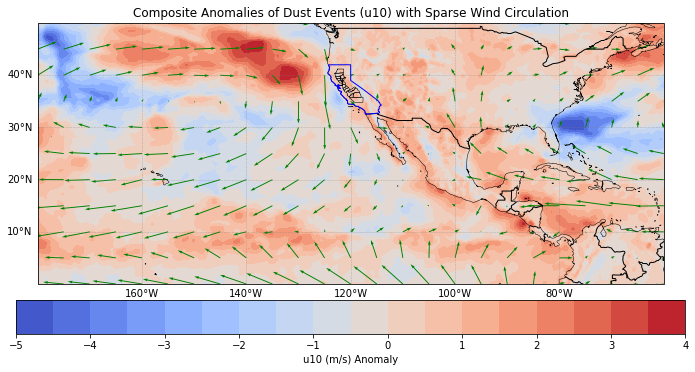

In [49]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
climatology = xr.open_dataset("climatology.nc")
dust_event = xr.open_dataset("dust_event.nc")
u_wind_data = xr.open_dataset("u2.nc")
v_wind_data = xr.open_dataset("v2.nc")

# Extract latitude, longitude, and u10 variables
lat = climatology['latitude'].values
lon = climatology['longitude'].values
climatology_u10 = climatology['u10'].values
dust_event_u10 = dust_event['u10'].values

# Extract u and v wind components
u_wind = u_wind_data['u'].squeeze(axis=0).mean(axis=0)  # Squeeze and average over time
v_wind = v_wind_data['v'].squeeze(axis=0).mean(axis=0)

# Ensure the variables are 2D by checking dimensions
if climatology_u10.ndim == 3:
    climatology_u10 = climatology_u10[0, :, :]
if dust_event_u10.ndim == 3:
    dust_event_u10 = dust_event_u10[0, :, :]

# Restrict data to the specific coordinates
lon_mask = (lon >= -180) & (lon <= -60)
lat_mask = (lat >= 0) & (lat <= 50)

lon_restricted = lon[lon_mask]
lat_restricted = lat[lat_mask]

climatology_u10_restricted = climatology_u10[lat_mask, :][:, lon_mask]
dust_event_u10_restricted = dust_event_u10[lat_mask, :][:, lon_mask]

u_wind_restricted = u_wind[lat_mask, :][:, lon_mask]
v_wind_restricted = v_wind[lat_mask, :][:, lon_mask]

# Compute anomalies: Dust event minus climatology
anomalies_restricted = dust_event_u10_restricted - climatology_u10_restricted

# Create a meshgrid for plotting
lon2d, lat2d = np.meshgrid(lon_restricted, lat_restricted)

# Plot the composite anomalies with statistical significance and quiver overlay
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.set_extent([-180, -60, 0, 50], crs=ccrs.PlateCarree())

# Plot anomalies
anomaly_plot = ax.contourf(lon2d, lat2d, anomalies_restricted, levels=20, cmap='coolwarm', transform=ccrs.PlateCarree())

# Overlay wind vectors as quivers with sparse spacing
quiver_spacing = 20  # Increase the spacing for a sparser quiver plot
ax.quiver(lon2d[::quiver_spacing, ::quiver_spacing], lat2d[::quiver_spacing, ::quiver_spacing], 
          u_wind_restricted[::quiver_spacing, ::quiver_spacing], 
          v_wind_restricted[::quiver_spacing, ::quiver_spacing],
          scale=200, transform=ccrs.PlateCarree(), color='green', width=0.0015)

# Add map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')

# Add California and Central Valley shapefiles
california_shapefile = "california_shapefile.shp"  # Replace with the path to the shapefile
central_valley_shapefile = "central_valley_counties.shp"  # Replace with the path to the shapefile

# Add California counties
california_feature = ShapelyFeature(Reader(california_shapefile).geometries(),
                                    ccrs.PlateCarree(), edgecolor='blue', facecolor='none', linewidth=1)
ax.add_feature(california_feature, label="California Counties")

# Add Central Valley
central_valley_feature = ShapelyFeature(Reader(central_valley_shapefile).geometries(),
                                        ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)
ax.add_feature(central_valley_feature, label="Central Valley")



# Add gridlines
gridlines = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gridlines.top_labels = False
gridlines.right_labels = False
gridlines.xlabel_style = {'size': 10, 'color': 'black'}
gridlines.ylabel_style = {'size': 10, 'color': 'black'}

# Add title and colorbar
ax.set_title("Composite Anomalies of Dust Events (u10) with Sparse Wind Circulation")
cbar = fig.colorbar(anomaly_plot, ax=ax, orientation='horizontal', pad=0.05, label="u10 (m/s) Anomaly")

plt.show()
